##Joanna Sierra-Mendoza
##DSC550
##Model Building Term Project: Credit Card Fraud Detection

MILESTONE 1: DATA SELECTION

According to the Federal Trade Commission, in 2024 there were 449,032 reports of credit card fraud. This is a growing threat that affects both consumers and financial institutions. As more transactions move online, detecting fraudulent activitly accurately has become an important task in the finance industry. This project aims to address the problem of identifying fraudulent credit card transactions using machine learning. Being able to flag fraudulent behavior early allows financial institutions to protect customer accounts, prevent losses, and maintain trust in digital payment systems.

The dataset used for this project is from Kaggle and contains 284,807 anonymized credit card transactions made by European cardholders in September 2013. The target variable for this project is the "Class" column, where a value of 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent one. Since there only 492 fraudlent transactions in this dataset, evaluation metrics such as accuracy alone are not sufficient. Instead, this project will prioritize metrics like precision, F1-score, and AUC-ROC, which are better for assessing performance in this case of having a small amount fraudulent transacions vs non-fraudulent ones. 

To better understand the data, this milestone of the project focuses on creating and analyzing graphs. By visualizing the distribution of fraud vs non-fraud transactions, transaction amounts, and timing patterns, we can uncover insights that may help distinguish fraudulent behavior. These visual patterns will help determine which features are most relevant and what strategies might imporve the model's ability to detect fraud. The ultimate goal of this project is to build a predictive model that can accurately classify future transactions and help financial institutions prevent fraud. 

Sources:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
https://www.ftc.gov/system/files/ftc_gov/pdf/csn-annual-data-book-2024.pdf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
transactions = df['Class'].value_counts()
print("Non-fraudlent transactions:", transactions[0])
print("Fraudulent transactions:", transactions[1])

Non-fraudlent transactions: 284315
Fraudulent transactions: 492


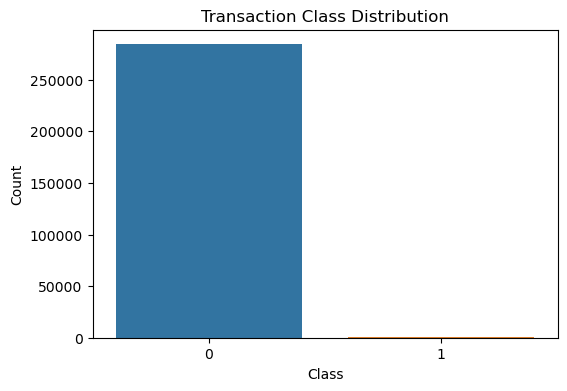

In [6]:
#1. Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

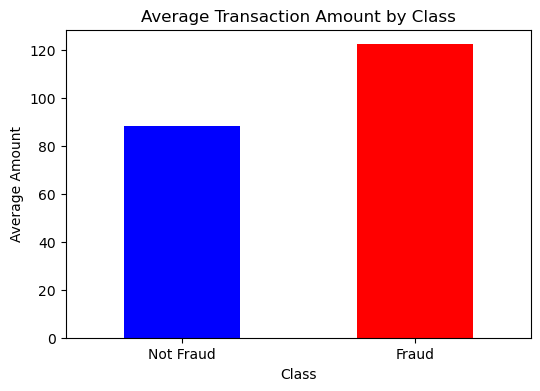

In [7]:
#2. Amount transaction amount by class
avg_amounts = df.groupby('Class')['Amount'].mean()
plt.figure(figsize=(6,4))
avg_amounts.plot(kind='bar', color=['blue', 'red'])
plt.title("Average Transaction Amount by Class")
plt.xlabel("Class")
plt.ylabel("Average Amount")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'], rotation=0)
plt.show()

C:\Users\joann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


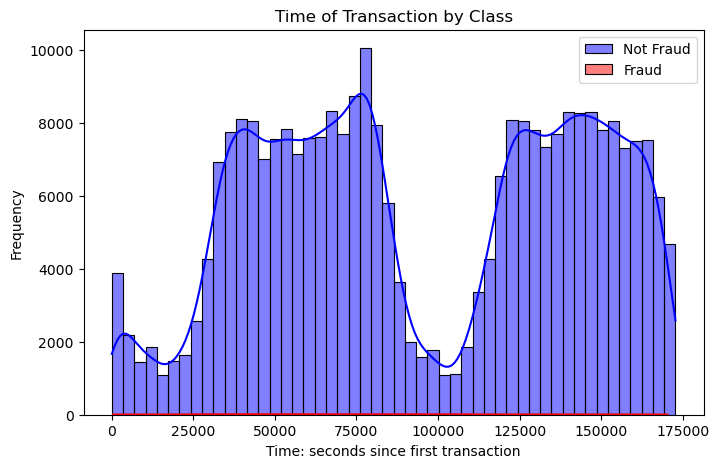

In [8]:
#3. time of transaction vs class
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class']==0]['Time'], bins=50, color='blue', label='Not Fraud', kde=True)
sns.histplot(df[df['Class']==1]['Time'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Time of Transaction by Class")
plt.xlabel("Time: seconds since first transaction")
plt.ylabel("Frequency")
plt.show()

C:\Users\joann\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


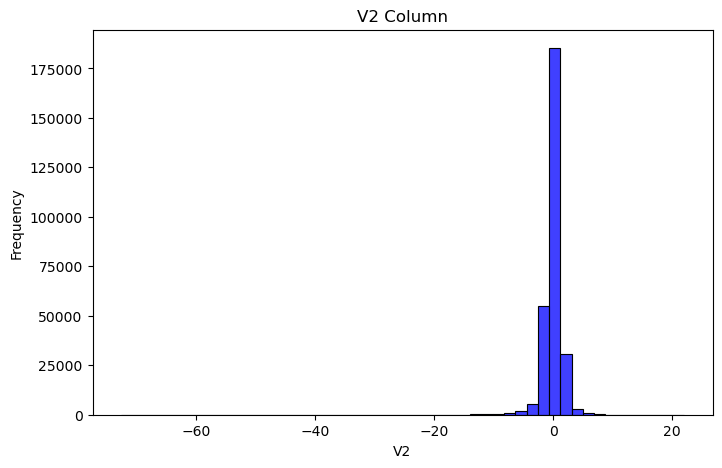

In [9]:
#4. V2 histogram
plt.figure(figsize=(8,5))
sns.histplot(df['V2'], bins=50, color='blue')
plt.title("V2 Column")
plt.xlabel("V2")
plt.ylabel("Frequency")
plt.show()


Graph Analysis
1. The dataset has more non-fraudulent transactions than fraudulent ones.
2. Fruadulent transactions have a higher average amount than non-fraudlent ones, which suggests that fraud may involve larger charges.
3. The timing of fraudlent transactions shows no visible activity across the time axis, unlike the non-faudlent ones which are evenly distributed. This could suggest that fraudulent behavior is less dependent on time or that fraud happens in very short bursts that are harder to detect.
4. The values in the V2 column show a narrow concentration of values near zero. This distribution suggests that V2 captures subtle variance in transaction patterns and the extreme values may be useful for identifying fraudulent activity. 


MILESTONE 2: DATA PREPARATION

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The average Amount value is ~88 and the maximum transaction was 25,691. Scaling will need to be performed since there are values ranging from 0 up to the maximum value which is 25,691. Most features are results of PCA and are already standardized, with means and standard deviations close to 1. The time and amount column are not standaridized.  

<Axes: >

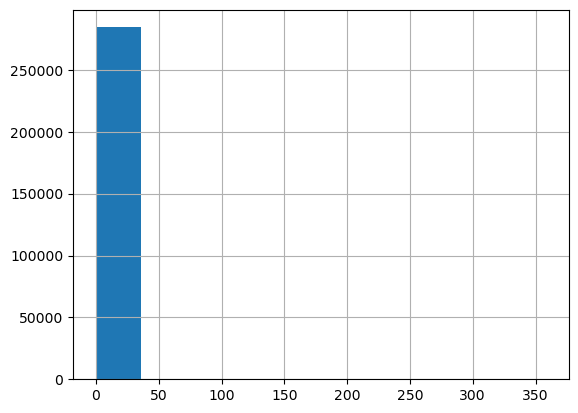

In [29]:
from sklearn.preprocessing import RobustScaler
df2 = df.copy()
df2['Amount'] = RobustScaler().fit_transform(df2['Amount'].to_numpy().reshape(-1,1))
df2['Amount'].hist()

In [31]:
df2['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

RobustScaler is less sensitive to outliers and is useful in this case due to the extreme values, max is now 358 instead of 25,691. Standard deviation is smaller after this transformation. 

In [38]:
#cleaning time column so values are between 0 and 1 (scaling)
time = df2['Time']
df2['Time'] = (time - time.min()) / (time.max() - time.min())
df2['Time'].head()

0    0.000000
1    0.000000
2    0.000006
3    0.000006
4    0.000012
Name: Time, dtype: float64

Min-max normalization was applied to the 'Time' column, which scaled the values between 0 and 1. This was done by subtracting the minimum time value from each entry and dividing by the overall range of the column. Scaling this column will help ensure that it is on the same scale as the other features, so that the model works effectively since large differences in feature magnitudes can cause issues. The other features were PCA transformed ones that are centered around 0 and having extreme values from this can cause problems with the model, such as giving too much importance to the 'Time' feature. 

In [45]:
#check for missing data
df2.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [49]:
#check for duplicates
df2.duplicated().sum()

1081

In [53]:
df2 = df2.drop_duplicates()
df2.duplicated().sum()

0

Even though column meanings are unknown, if a row is duplicated, it doesn't add new value to the model. Duplicates were removed because they will keep the model from forming biases. 

MILESTONE 3: MODEL BUILDING AND EVALUATION

In [2]:
import pandas as pd
import numpy as np
df3 = pd.read_csv("preprocessed_creditcard2.csv")
df3.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [4]:
df3.shape

(283726, 31)

In [8]:
#splitting data into train, test, and validation sets
train, test, val = df3[:240000], df3[240000:262000], df3[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239581
 1       419
 Name: count, dtype: int64,
 Class
 0    21962
 1       38
 Name: count, dtype: int64,
 Class
 0    21710
 1       16
 Name: count, dtype: int64)

In [10]:
#numpy arrays
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (21726, 31))

In [14]:
#split into input and outputs
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (21726, 30), (21726,))

In [16]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

C:\Users\joann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991375

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21710
       Fraud       0.67      0.38      0.48        16

    accuracy                           1.00     21726
   macro avg       0.83      0.69      0.74     21726
weighted avg       1.00      1.00      1.00     21726



Model is better at classifying non-fraudulent transactions since there is more data for that than fraudulent ones.

In [31]:
#neural network 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))  
shallow_nn.add(Dense(2, activation='relu'))      
shallow_nn.add(BatchNormalization())            
shallow_nn.add(Dense(1, activation='sigmoid'))

#save best model during training
checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)

shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
shallow_nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [35]:
# fit model
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=[checkpoint])

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9609 - loss: 0.1647 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9995 - val_loss: 0.0033


In [40]:
#predictions for validation set
def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step    


array([0, 0, 0, ..., 0, 0, 0])

In [42]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21710
       Fraud       0.71      0.62      0.67        16

    accuracy                           1.00     21726
   macro avg       0.86      0.81      0.83     21726
weighted avg       1.00      1.00      1.00     21726



Comparing the precision, recall, and f1-score values of both models suggests that the neural network model performed better. 

In [45]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)

print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21710
       Fraud       0.86      0.38      0.52        16

    accuracy                           1.00     21726
   macro avg       0.93      0.69      0.76     21726
weighted avg       1.00      1.00      1.00     21726



Precision of the Random forest model is higher than the previous 2 models. 

In [48]:
#Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     21710
       Fraud       0.67      0.50      0.57        16

    accuracy                           1.00     21726
   macro avg       0.83      0.75      0.79     21726
weighted avg       1.00      1.00      1.00     21726



In [52]:
#downsize non-fraud transactions
not_frauds = df3.query('Class == 0')
frauds = df3.query('Class == 1')

not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    283253
 Name: count, dtype: int64,
 Class
 1    473
 Name: count, dtype: int64)

In [54]:
#balance dataset
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()




Class
1    473
0    473
Name: count, dtype: int64

In [56]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
119312,0.437410,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,1.432684,1
49720,0.256227,1.295012,-0.632173,0.175188,-0.873518,-0.639303,-0.123504,-0.598259,0.047044,-1.083275,...,0.225563,0.501270,-0.102377,-0.273937,0.447646,-0.173103,0.006899,0.003133,0.279466,0
237482,0.866012,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,...,0.397058,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,-0.279466,1
41033,0.234901,1.466227,-1.237043,0.760214,-1.352674,-1.814018,-0.380354,-1.464998,0.104803,-1.318544,...,-0.058033,0.206717,0.057141,0.027775,0.207465,-0.067165,0.057436,0.018893,-0.223573,0
95828,0.379971,1.346575,-0.627765,0.732566,-0.695801,-1.174406,-0.456386,-0.880558,0.050006,-0.500805,...,0.062036,0.074161,0.116975,0.056943,0.152417,-0.334687,0.033740,0.020576,-0.159715,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93620,0.374201,1.187646,-0.570626,0.827281,0.050757,-1.317498,-0.640563,-0.657251,0.069218,1.254717,...,0.015708,0.103494,-0.059571,0.472923,0.194597,1.535116,-0.091466,0.004182,0.221477,0
15757,0.157716,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,1.089779,1
63558,0.294452,-0.684061,0.985100,1.282391,-0.410617,0.305796,-0.140418,0.784880,-0.134384,-0.421872,...,0.011181,0.112462,-0.383430,-0.174391,0.331004,1.280578,-0.287476,0.030996,-0.192832,0
112392,0.421455,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,...,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,0.321805,1


In [60]:
#numpy array
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b,  y_test_b  = balanced_df_np[700:823, :-1], balanced_df_np[700:823, -1].astype(int)
x_val_b,   y_val_b   = balanced_df_np[823:, :-1], balanced_df_np[823:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (123, 30), (123,), (123, 30), (123,))

In [62]:
#number of classes
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    354
 0    346
 Name: count, dtype: int64,
 0    68
 1    55
 Name: count, dtype: int64,
 1    64
 0    59
 Name: count, dtype: int64)

In [64]:
#Logistic regression on balanced data
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)

print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))



              precision    recall  f1-score   support

   Not Fraud       0.89      0.97      0.93        59
       Fraud       0.97      0.89      0.93        64

    accuracy                           0.93       123
   macro avg       0.93      0.93      0.93       123
weighted avg       0.93      0.93      0.93       123



In [66]:
logistic_model_b.score(x_train_b, y_train_b)

0.9485714285714286

In [68]:
#Lower accuracy since dataset is no longer imbalanced. 

In [70]:
#neural network on balanced data
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, activation='relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, activation='sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b.keras', save_best_only=True)

shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn_b.fit(x_train_b, y_train_b,validation_data=(x_val_b, y_val_b),epochs=40,callbacks=[checkpoint])

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3451 - loss: 1.0193 - val_accuracy: 0.4146 - val_loss: 0.7401
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4361 - loss: 0.8581 - val_accuracy: 0.5610 - val_loss: 0.6540
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5790 - loss: 0.6500 - val_accuracy: 0.7154 - val_loss: 0.5446
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7227 - loss: 0.5467 - val_accuracy: 0.7561 - val_loss: 0.4789
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7575 - loss: 0.4944 - val_accuracy: 0.7805 - val_loss: 0.4495
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.4661 - val_accuracy: 0.7967 - val_loss: 0.4298
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8291 - loss: 0.4519 - val_accuracy: 0.8455 - val_loss: 0.4146
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8212 - loss: 0.4336 - val_accuracy: 0.8699 - val_loss

In [72]:
#second round comparison
shallow_nn_b.fit(x_train_b, y_train_b,validation_data=(x_val_b, y_val_b),epochs=40,callbacks=[checkpoint])

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8895 - loss: 0.2306 - val_accuracy: 0.9106 - val_loss: 0.3426
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8810 - loss: 0.2550 - val_accuracy: 0.9024 - val_loss: 0.3450
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9123 - loss: 0.2199 - val_accuracy: 0.9024 - val_loss: 0.3453
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8737 - loss: 0.2438 - val_accuracy: 0.9024 - val_loss: 0.3482
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9024 - loss: 0.2204 - val_accuracy: 0.9024 - val_loss: 0.3476
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8929 - loss: 0.2178 - val_accuracy: 0.9106 - val_loss: 0.3475
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9057 - loss: 0.2181 - val_accuracy: 0.9106 - val_loss: 0.3493
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9103 - loss: 0.2049 - val_accuracy: 0.9024 - val_loss:

By epoch 6, val_accuracy goes from .41 to .91. Peak accuracy of about 91% is also reached by this point. 

In [75]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 
              precision    recall  f1-score   support

   Not Fraud       0.87      0.93      0.90        59
       Fraud       0.93      0.88      0.90        64

    accuracy                           0.90       123
   macro avg       0.90      0.90      0.90       123
weighted avg       0.90      0.90      0.90       123



In [77]:
#change to 1 relu to help with overfitting
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape[1],)))       
shallow_nn_b1.add(Dense(1, activation='relu'))          
shallow_nn_b1.add(BatchNormalization())                  
shallow_nn_b1.add(Dense(1, activation='sigmoid'))       

checkpoint = ModelCheckpoint('shallow_nn_b1.keras', save_best_only=True)

shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn_b1.fit(x_train_b, y_train_b,validation_data=(x_val_b, y_val_b),epochs=40,callbacks=[checkpoint])

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8281 - loss: 0.4968 - val_accuracy: 0.7886 - val_loss: 0.4777
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8542 - loss: 0.4743 - val_accuracy: 0.8455 - val_loss: 0.4454
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8245 - loss: 0.4732 - val_accuracy: 0.8455 - val_loss: 0.4296
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8315 - loss: 0.4618 - val_accuracy: 0.8618 - val_loss: 0.4248
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8778 - loss: 0.4336 - val_accuracy: 0.8618 - val_loss: 0.4182
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8702 - loss: 0.4325 - val_accuracy: 0.8537 - val_loss: 0.4139
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8676 - loss: 0.4238 - val_accuracy: 0.8699 - val_loss: 0.4097
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8750 - loss: 0.4212 - val_accuracy: 0.8862 - val_loss

In [79]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
              precision    recall  f1-score   support

   Not Fraud       0.85      0.98      0.91        59
       Fraud       0.98      0.84      0.91        64

    accuracy                           0.91       123
   macro avg       0.92      0.91      0.91       123
weighted avg       0.92      0.91      0.91       123



In [83]:
#Did just as good as previous model, slightly better. 

In [81]:
#Random forest on balanced data
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)

print(classification_report(y_val_b, rf_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.86      1.00      0.92        59
       Fraud       1.00      0.84      0.92        64

    accuracy                           0.92       123
   macro avg       0.93      0.92      0.92       123
weighted avg       0.93      0.92      0.92       123



In [85]:
#Gradient Boosting Classifier
gbc_b = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)

print(classification_report(y_val_b, gbc_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.85      0.95      0.90        59
       Fraud       0.95      0.84      0.89        64

    accuracy                           0.89       123
   macro avg       0.90      0.90      0.89       123
weighted avg       0.90      0.89      0.89       123



In [89]:
#Logistic regression has the best performance out of all the models, so it will be used on the test set
from sklearn.metrics import classification_report, confusion_matrix
y_test_pred_b = logistic_model_b.predict(x_test_b)
print(classification_report(y_test_b, y_test_pred_b, target_names=['Not Fraud', 'Fraud']))
print(confusion_matrix(y_test_b, y_test_pred_b))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.97      0.96        68
       Fraud       0.96      0.93      0.94        55

    accuracy                           0.95       123
   macro avg       0.95      0.95      0.95       123
weighted avg       0.95      0.95      0.95       123

[[66  2]
 [ 4 51]]


For Milestone 3, I built and evaluated several classification models to detect fraudulent transactions. I first worked with the imbalanced dataset, where fraudulent transactions made up a very small portion of the total. I split the dataset into training, testing, and validation sets. The training set was used to teach the models how to distinguish between fraudulent and non-fraudulent transactions. The validation set helped tune the models and monitor their performance during training, allowing me to adjust parameters and prevent overfitting. I then trained multiple models on the balanced data, including logistic regression, shallow neural networks (with 1 and 2 hidden units), random forest, and gradient boosting. Each model's performance was evaluated using accuracy, precision, recall, and F1-score. After that, I created a smaller, balanced version of the dataset by keeping all fraudulent transactions and randomly sampling an equal number of non-fraudulent ones. I repeated the modeling process with this dataset to compare performance. Finally, the test set was then passed to the best model to see how well it generalized to new data. Almost all of the models performed well, but logistic regression showed the best results overall, achieving a fraud precision of ~96%, recall of ~93%, and F1-score of ~94% on the test set. Logistic regression was the most effective model due to its strong performance and simplicity. 